In [ ]:
Q1) Delivery_time -> Predict delivery time using sorting time. Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [ ]:
# Data Understanding 

In [3]:
Lin_reg=pd.read_csv('E:\DS_assignments\delivery_time.csv')

In [4]:
Lin_reg

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Process of EDA

In [5]:
Lin_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time'>

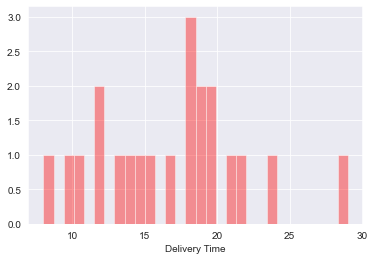

In [6]:
#sns.displot(Lin_reg['Delivery Time'])
sns.set_style('darkgrid')
sns.distplot(Lin_reg['Delivery Time'], kde = False, color ='red', bins = 30)

<AxesSubplot:xlabel='Sorting Time'>

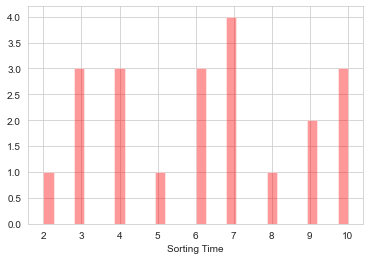

In [7]:
sns.set_style('whitegrid')
sns.distplot(Lin_reg['Sorting Time'], kde = False, color ='red', bins = 30)

In [8]:
Lin_reg1=Lin_reg.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
Lin_reg1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [9]:
#print(Lin_reg)
column_1 = Lin_reg1["delivery_time"]
column_2 = Lin_reg1["sorting_time"]
correlation = column_1. corr(column_2) #calculate correlation between `column_1` and `column_2`
print(correlation)

0.8259972607955326


In [10]:
Lin_reg1.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


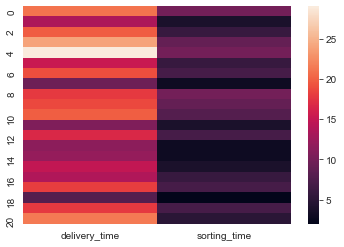

In [11]:
#import seaborn as sns
#import matplotlib.pyplot as plt
sns.heatmap(Lin_reg1)
plt.show()

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

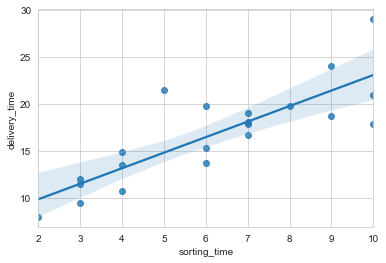

In [12]:
sns.regplot(x=Lin_reg1['sorting_time'],y=Lin_reg1['delivery_time'])

# Delivery time and sorting time are moderately corelated.

In [13]:
model=smf.ols("delivery_time~sorting_time",data=Lin_reg1).fit()

In [14]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           3.98e-06
Time:                        15:19:06   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model.pvalues,model.pvalues

(Intercept       0.001147
 sorting_time    0.000004
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [26]:
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [28]:
del_time = (6.582734) + (1.649020)*(5)
del_time

14.827834

In [37]:
new_data=pd.Series([7,2])
new_data

0    7
1    2
dtype: int64

In [38]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,7
1,2


In [39]:
model.predict(data_pred)

0    18.125873
1     9.880774
dtype: float64

In [ ]:
Simple Linear Regression model is developed for the prediction. It predicts delivery time as 18.12 and 9.88 for the sorting time 7 and 2 respectively.